# Cell Type Annotation

In [1]:
import scanpy as sc
import os
import gzip
import shutil
from tqdm.notebook import tqdm
import anndata
import matplotlib.pyplot as plt
import helpers_danielstrobel
from IPython.display import Image
import numpy as np
import seaborn as sns
from scipy.stats import median_abs_deviation
import anndata2ri
import logging
import scrublet
import pandas as pd




import rpy2.rinterface_lib.callbacks as rcb
import rpy2.robjects as ro


rcb.logger.setLevel(logging.ERROR)
ro.pandas2ri.activate()
anndata2ri.activate()

%load_ext rpy2.ipython

sc.settings.verbosity = 0
sc.settings.set_figure_params(
    dpi=80,
    facecolor="white",
    frameon=False,
)
plt.rcParams['figure.figsize'] = (9, 9)

/Users/leahollenberg/Desktop/Masterpraktikum/PycharmProjects/scanpy_start/venv/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:368: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  warnings.warn('The global conversion available with activate() '
/Users/leahollenberg/Desktop/Masterpraktikum/PycharmProjects/scanpy_start/venv/lib/python3.8/site-packages/rpy2/robjects/numpy2ri.py:241: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  warnings.warn('The global conversion available with activate() '
/Users/leahollenberg/Desktop/Masterpraktikum/PycharmProjects/scanpy_start/venv/lib/python3.8/site-packages/rpy2/robjects/conversion.py:28: DeprecationWarning: The use of converter in module rpy2.robjects.conversion is deprecated. Use rpy2.robjects.conversion.get_conversion() instead o

/Users/leahollenberg/Desktop/Masterpraktikum/PycharmProjects/scanpy_start/venv/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:163: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))
/Users/leahollenberg/Desktop/Masterpraktikum/PycharmProjects/scanpy_start/venv/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


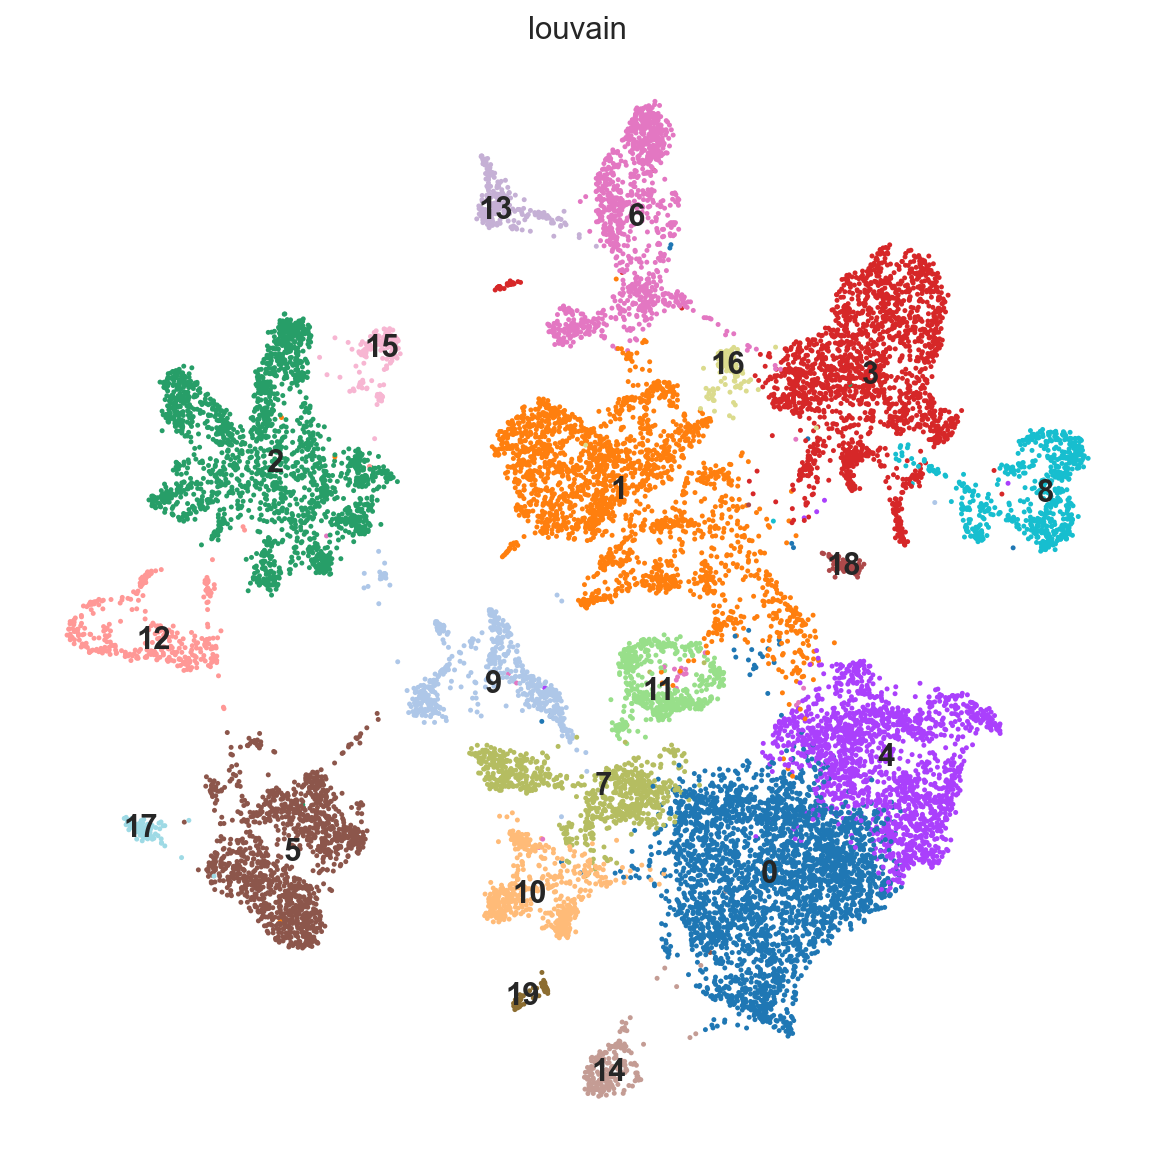

In [ ]:
# load data
adata = sc.read("data/adata_processed_2_lea.h5ad")
sc.tl.louvain(adata, resolution=0.4)
sc.pl.umap(adata, color='louvain', size=20, legend_loc='on data')

In [27]:
# cell type specific genes
marker_genes = {
    "Neutrophil": ["S100a8", "S100a9"],
    "AT1": ["S100a6", "Ager", "Pdpn", "Vegfa"],   # Vegfa added from Helperclass
    "AT2": ["Muc1", "Sftpc", "Sftpd", "Cxcl15", "Lcn2"],   # Lcn2 added from Helperclass
    "Transitioning epi": ["Krt8", "Krt18"],
    "Club": ["Scgb1a1", "Scgb3a2"],
    "Goblet": ["Muc5ac", "Muc5b"],
    "Ciliated": ["Foxj1", "Pifo"],
    "T-Cells": ["Cd3e", "Cd4", "Cd8a", "Cd3d"],   # Cd3d added from Helperclass
    "NK-Cells": ["Tyrobp", "Gzma", "Nkg7"],
    "B-Cells": ["Cd79a", "Cd19", "Ms4a1"],
    "Monocytes": ["Cd14", "Vcan", "FCGR3A (CD16)", "Fcgr4"],
    "Plasmacytoid dendridic": ["Siglech", "Clec4c"],
    "Interstitial macrophages": ["Trem2", "C1qa"],
    "Alveolar macrophage": ["Marco", "Chil3", "Fabp4"],
    "Classical Monocyte": ["F13a1", "Ly6c2"],
    "Nonclassical monocyte": ["Treml4", "Fcgr3"],
    "Dendridic": ["Clec9a", "H2-Aa"],
    "Ccr7 dendridic": ["Ccr7"],
    "Basophil": ["Cpa3"],
    "SMCs": ["Acta2", "Tagln"],
    "Myofibroblasts": ["Cthrc1", "Spp1", "Pdgfra", "Col3a1", "Postn", "Tnc", "S100a6", "Ccl2"],   # Col3a1, Postn, Tnc, S100a6, Ccl2 added from Helperclass
    "Fibroblasts": ["Col1a2"],
    "Mesothelial": ["Msln", "Upk3b"],
    "Pericytes": ["Vtn", "Mcam"],
    "Peribronchiolar fibroblasts": ["Hhip", "Aspn"],
    "Alveolar fibroblasts": ["Npnt"],
    "Adventitial fibroblasts": ["Dcn", "Pi16"],
    "Endothelial": ["Pecam1", "Ly6c1"],
    "Aerocyte": ["Car4", "Ednrb"],
    "Vein endo": ["Slc6a2", "Vegfc"],
    "Lymphatic endothelial": ["Pdpn"]
}

In [28]:
marker_genes_in_data = dict()
for ct, markers in marker_genes.items():
    markers_found = list()
    for marker in markers:
        if marker in adata.var.index:
            markers_found.append(marker)
    marker_genes_in_data[ct] = markers_found

In [ ]:
# nicht ausgeführt hochgeladen da es zu viele plots sind
for ct in marker_genes_in_data.keys():
    print(f"{ct.upper()}:")  # print cell subtype name
    sc.pl.umap(
        adata,
        color=marker_genes_in_data[ct],
        vmin=0,
        vmax="p99",
        sort_order=False,
        frameon=False,
        cmap="Reds",
    )
    plt.savefig(os.path.join("/Users/leahollenberg/Desktop/Masterpraktikum/Peyser/UMAP", f"{ct}_umap.png"))
    plt.close()
    print("\n\n\n")

Cluster 0: Alveolare Makrophagen
- Markergene: Fcer1g, Tyrobp, C1qb, Lyz2, Ctss, C1qa, Lyz1, C1qc, Ftl1, Fcgr3

Cluster 1: Endothelzellen
- Markergene: Egfl7, Epas1, Ramp2, Tspan7, Cdh5, Cldn5, Calcrl, Ly6a, Aqp1, Cd36

Cluster 2: Lymphozyten
- Markergene: Rac2, Rps15a, Tmsb10, Rpl13a, Uba52, Rpl19, Rps7, Rpl3, Rps3, Shisa5

Cluster 3: Fibroblasten
- Markergene: Bgn, Mgp, Serping1, Gpx3, Sparc, Fxyd1, Sod3, Gsn, Col1a2, Rbp1

Cluster 4: Alveolare Makrophagen
- Markergene: Ctsd, Psap, Fth1, Ftl1, Lyz2, Ctss, Lyz1, Mpeg1, Cd9, Msrb1

Cluster 5: B-Zellen
- Markergene: Cd79a, Cd74, Cd79b, Ighm, Igkc, Ly6d, Rpl18a, Rpl13a, H2-Aa, H2-Eb1

Cluster 6: Clubzellen
- Markergene: Spint2, Wfdc2, Chchd10, Vamp8, Cldn18, Gpx4, Alcam, Ager, Atp1b1, Sftpd

Cluster 7: Monozyten/Makrophagen
- Markergene: Cd74, Lsp1, S100a4, H2-Aa, Tmsb4x, Sh3bgrl3, H2-Eb1, Syngr2, Rps11, Rpsa

Cluster 8: Mesenchymale Stromazellen
- Markergene: Dcn, C3, Serping1, Aebp1, Ifitm3, Rarres2, Igfbp6, Nkain4, Selm, Ptgis

Cluster 9: Monozyten/Makrophagen
- Markergene: Tyrobp, Fcer1g, Hp, Ifitm2, Alox5ap, Sh3bgrl3, Coro1a, Ifitm3, Msrb1, Pirb

Cluster 10: Monozyten/Makrophagen
- Markergene: Tyrobp, Fcer1g, Ifitm3, Lyz2, Lyz1, Plac8, Coro1a, Lst1, Alox5ap, Gpx1

Cluster 11: T-Zellen
- Markergene: Cst3, H2-Ab1, Cd74, H2-Aa, H2-Eb1, Plbd1, Tmsb4x, H2-DMb1, H2-DMa, Id2

Cluster 12: T-Zellen
- Markergene: Lck, Thy1, Hmgb1, Ptma, Stmn1, Lat, Dntt, Ppia, Cd3g, Hmgb2

Cluster 13: Alveolare Makrophagen
- Markergene: Sec14l3, Cd24a, Chchd10, Tppp3, Elof1, Wfdc2, Ccdc153, Dynlrb2, Riiad1, 1110017D15Rik

Cluster 14: Alveolarepithelzellen
- Markergene: Fn1, Wfdc17, Gpx1, Tyrobp, Emilin2, Alox5ap, C1qc, Itgam, Cfp, Prg4

Cluster 15: Ribosomenreiche Zellen
- Markergene: Rpl18a, Uba52, Rps24, Rps7, Rpl17, Rpl13a, Rps14, Rps23, Rpl4, Rps6

Cluster 16: Glatter Muskel
- Markergene: Myl9, Tpm2, Cald1, Tagln, Acta2, Myl6, Mylk, Bgn, Ppp1r14a, Dstn

Cluster 17: Ribosomenreiche Zellen
- Markergene: Rpl18a, Rps24, Cd74, Rpl13, Rps19, Rps15a, Rpl32, Rpl13a, Rps5, Uba52

Cluster 18: Lymphatische Endothelzellen
- Markergene: Gng11, Mmrn1, Cldn5, Flt4, Egfl7, S100a16, Prkcdbp, Igfbp4, Fkbp1a, Thy1

Cluster 19: Plasmazellen
- Markergene: Irf8, Bst2, Plac8, Tyrobp, Rpl31, Siglech, Dnajc7, Ighm, Pld4, Rnase6

/Users/leahollenberg/Desktop/Masterpraktikum/PycharmProjects/scanpy_start/venv/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:163: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))
/Users/leahollenberg/Desktop/Masterpraktikum/PycharmProjects/scanpy_start/venv/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


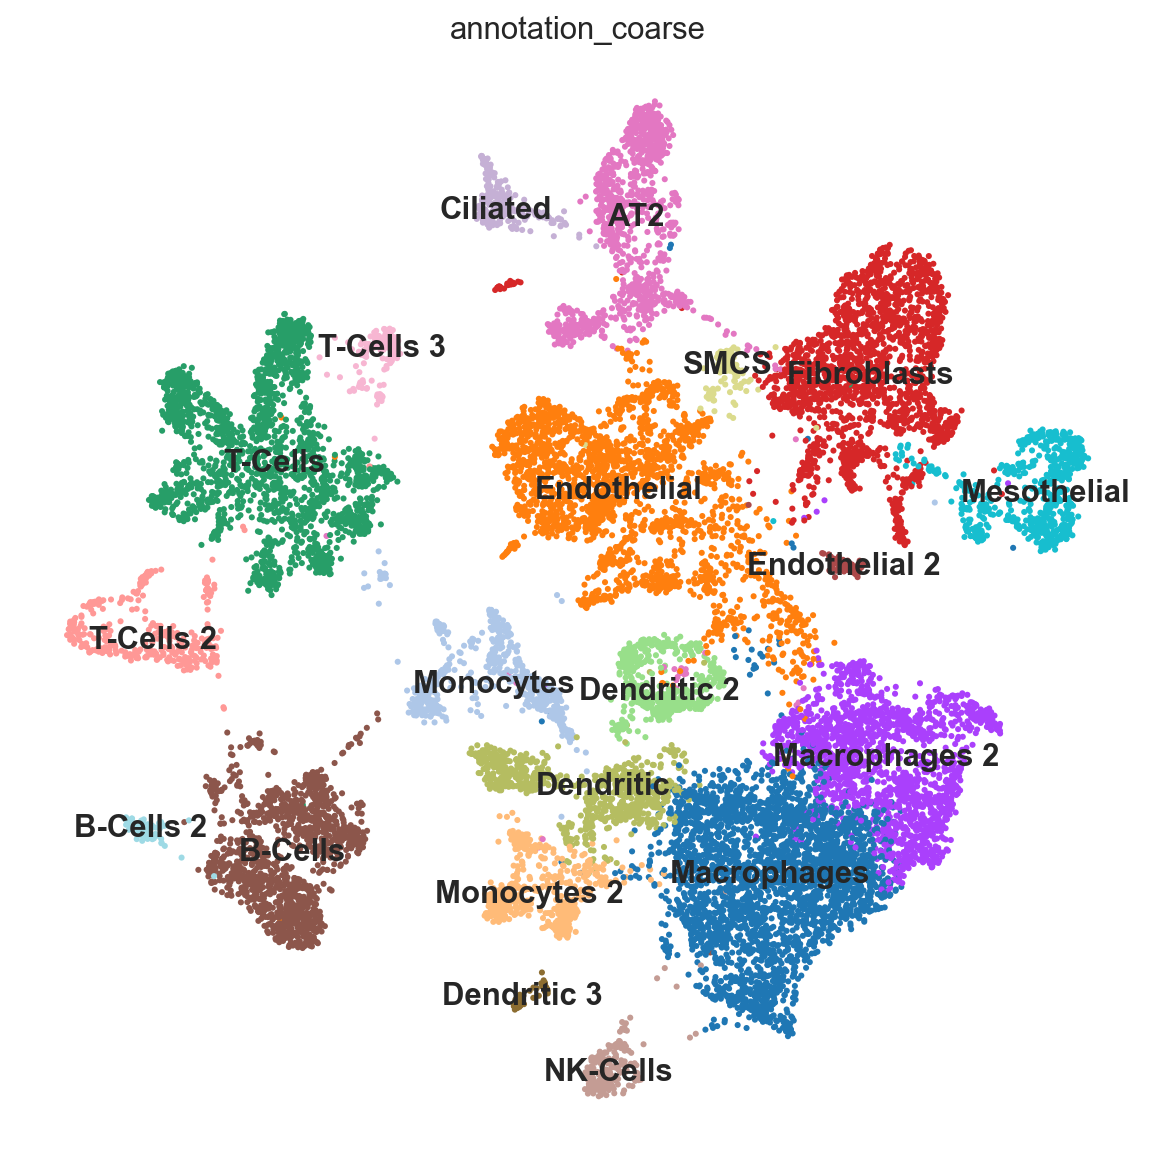

In [42]:
# add labels -> grob
# dazu wurden die Markergene der Zellarten und die Markergene der Cluster verwendet
adata.obs['annotation_coarse'] = adata.obs.louvain.cat.rename_categories([
    'Macrophages', 'Endothelial', "T-Cells", 'Fibroblasts', 'Macrophages 2', 'B-Cells',
    'AT2', 'Dendritic', 'Mesothelial', 'Monocytes', 'Monocytes 2', 'Dendritic 2', 'T-Cells 2',
    'Ciliated', 'NK-Cells', 'T-Cells 3', 'SMCS', 'B-Cells 2', 'Endothelial 2', 'Dendritic 3'])

sc.pl.umap(adata, color='annotation_coarse', size=30, legend_loc='on data')

/Users/leahollenberg/Desktop/Masterpraktikum/PycharmProjects/scanpy_start/venv/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:163: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))
/Users/leahollenberg/Desktop/Masterpraktikum/PycharmProjects/scanpy_start/venv/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


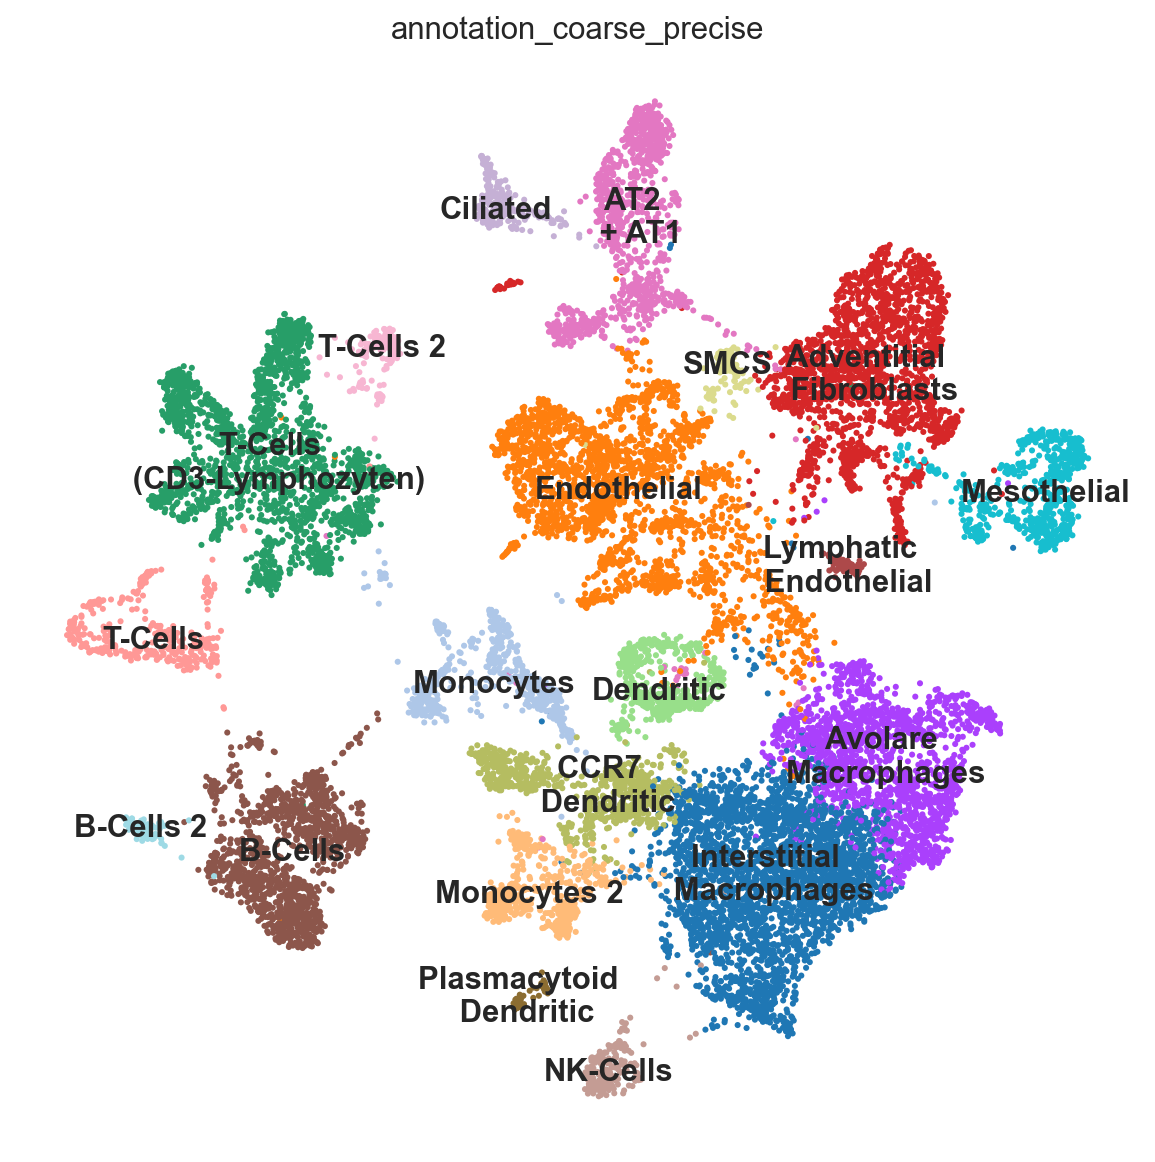

In [43]:
# add labels -> genauer
# dazu wurden die Markergene der Zellarten und die Markergene der Cluster verwendet
adata.obs['annotation_coarse_precise'] = adata.obs.louvain.cat.rename_categories([
    'Interstitial \n Macrophages', 'Endothelial', "T-Cells \n (CD3-Lymphozyten)",
    'Adventitial \n Fibroblasts', 'Avolare \nMacrophages', 'B-Cells', 'AT2 \n + AT1',
    'CCR7 \n Dendritic', 'Mesothelial', 'Monocytes', 'Monocytes 2', 'Dendritic',
    'T-Cells', 'Ciliated', 'NK-Cells', 'T-Cells 2', 'SMCS', 'B-Cells 2',
    'Lymphatic \n Endothelial', 'Plasmacytoid \n Dendritic'])


sc.pl.umap(adata, color='annotation_coarse_precise', size=30, legend_loc='on data')


In [44]:
adata.write("data/adata_annotated_lea.h5ad")